# Recognicition of The Office Quotes

For the NLP project we decided to get a Dataset consisting of 2 csv files:
- parent.csv :

    These are all quotes when the character was replying to someone else from the show.

- talking_head.csv :

    These are all quotes, from when the characters were directly interacting with the camera.

All the Quotes are from 4 main characters of the show, meaning they are the ones with the more prominent speaking roles:
- Michael
- Pam
- Jim
- Dwight

## Description of Dataset

Before we start with the Preprocessing steps and working with the Data in an NLP sense. We will take a look into the Data and see what exactly it offers and how balanced it is.

For that we create a DF for each kind of quote:
- camera quote
- reply

and merge them later to have both reply and camera quote in one df for a better comparison of what we are dealing with.

In [2]:
## --------------- IMPORTS ------------------- ##
import pandas as pd

In [4]:
df_reply = pd.read_csv('quotes/parent_reply.csv')
df_monologue = pd.read_csv('quotes/talking_head.csv')

In [17]:
df_reply.shape

(26150, 4)

In total here we have 26150 quotes

In [6]:
df_reply.describe()

,parent_id
count,26150.000000
mean,13074.500000
std,7548.999106
min,0.000000
25%,6537.250000
50%,13074.500000
75%,19611.750000
max,26149.000000


In [5]:
df_reply.head()

,parent_id,parent,reply,character
0,0,"Oh, I told you. I couldn’t close it. So…",So you’ve come to the master for guidance? Is ...,Michael
1,1,"Actually, you called me in here, but yeah.","All right. Well, let me show you how it’s done.",Michael
2,2,Well. I don’t know.,"If you think she’s cute now, you should have s...",Michael
3,3,What?,Any messages?,Michael
4,4,"Uh, yeah. Just a fax.","Oh! Pam, this is from Corporate. How many time...",Michael


<AxesSubplot:>

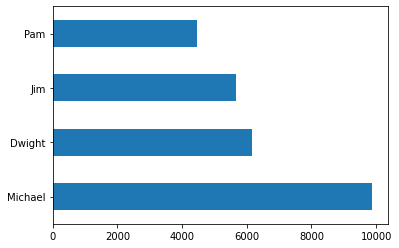

In [14]:
# now lets get the counts of the characters appearances in here
char_count = df_reply['character'].value_counts()
# next we want t visualize that in a barchart to get an overview of representation and balance
char_count.plot(kind="barh")

<AxesSubplot:ylabel='character'>

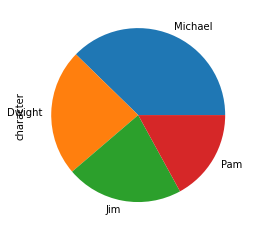

In [15]:
char_count.plot(kind="pie")

In [8]:
char_count

Michael    9859
Dwight     6163
Jim        5678
Pam        4450
Name: character, dtype: int64

Here we can see that here is a clear imbalance when it comes to characters replies.
Michael has the most with 9859 quotes saved in this set, nearly as much as the quotes of jim and pam combined. Therefore Jim and Pam have the least representation in this set.

The reason behind this though, is that Michael is the main character and his speaking role and time on camera is much higher compared to Jim and Pam.

### Monologue Dataset

In [18]:
df_monologue.shape

(1749, 3)

Here we can see we have crucially less quotes in this set. In total 1749 datapoints.

In [9]:
df_monologue.describe()

,quote_id
count,1749.000000
mean,874.000000
std,505.037127
min,0.000000
25%,437.000000
50%,874.000000
75%,1311.000000
max,1748.000000


In [10]:
df_monologue.head()

,quote_id,quote,character
0,0,"Yes, I’d like to speak to your office manager,...",Michael
1,1,"People say I am the best boss. They go, “God w...",Michael
2,2,Corporate really doesn’t really interfere with...,Michael
3,3,"Am I going to tell them? No, I am not going to...",Michael
4,4,I think I’m a role model here. I think I garne...,Michael


<AxesSubplot:>

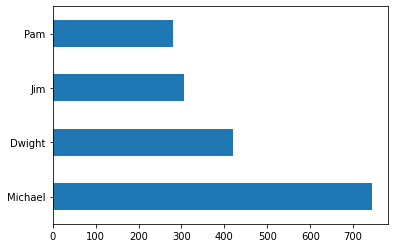

In [11]:
char_count = df_monologue['character'].value_counts()
# next we want t visualize that in a barchart to get an overview of representation and balance
char_count.plot(kind="barh")

<AxesSubplot:ylabel='character'>

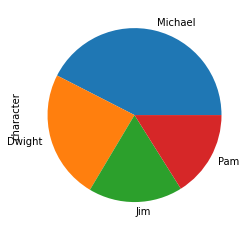

In [13]:
char_count.plot(kind="pie")

In [12]:
char_count

Michael    743
Dwight     419
Jim        306
Pam        281
Name: character, dtype: int64

Repeatedly we can see that here once again an imbalance is present between michael and the other three characters.

### Merged Data

Now lets merge the two dataframes and see how well each character is represented. We can then also use this dataset for preprocessing and training the model.

In [23]:
df_for_merge_reply = df_reply[['reply', 'character']]
df_for_merge_monologue = df_monologue[['quote', 'character']]
# to make the merge possible we have to rename the column names of the ro merge monologue dataframe
df_for_merge_reply.columns = ['quote','character']
df_merged = pd.concat([df_for_merge_reply, df_for_merge_monologue], ignore_index = True)

In [24]:
df_merged.shape

(27899, 2)

In [25]:
df_merged.head()

,quote,character
0,So you’ve come to the master for guidance? Is ...,Michael
1,"All right. Well, let me show you how it’s done.",Michael
2,"If you think she’s cute now, you should have s...",Michael
3,Any messages?,Michael
4,"Oh! Pam, this is from Corporate. How many time...",Michael


<AxesSubplot:>

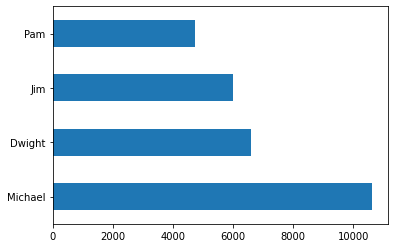

In [26]:
char_count = df_merged['character'].value_counts()
char_count.plot(kind="barh")

<AxesSubplot:ylabel='character'>

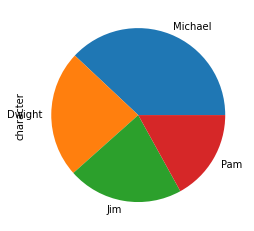

In [27]:
char_count.plot(kind="pie")

<AxesSubplot:>

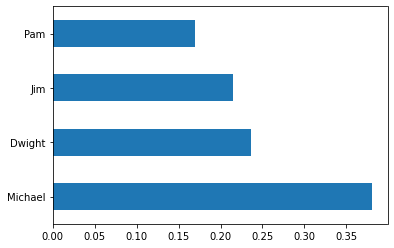

In [30]:
df_merged['character'].value_counts(normalize=True).plot(kind="barh")

In [31]:
char_count

Michael    10602
Dwight      6582
Jim         5984
Pam         4731
Name: character, dtype: int64

### Conclusion

In both Sets there is an imbalance between the more and less prominent speaking characters in the show, making Michael the one with the most quotes and therefore the best represented.

- Michael has a total of 10602 quotes in the entire dataset
- Dwight has a total of 6582 quotes
- Jim has a total of 5984 quotes
- Pam has a total of 4731 quotes

## Preprocessing

Before we can work with the quotes and use it for training we need to preprocess each of them.

Typical preprocessing steps are:
1. Tokenization
2. Lower casing
3. Stop Word Removal
4. Stemming
5. Lemmatization

And these are also the steps we will go through with our dataset. To make it easier we will be using the merged dataframe.

Why do we need preprocessing?
- We want to change the raw data into a clean data set. It reduces noisy data and other inconcistencies which would be really inconvenient to have in a dataset when training a model.